

# Project: Investigate & analyzing TMDB movies data.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



we will investigate and analyze the data by asking few questions 



1)what are the movies with the highest / lowest net profit ?


2)who are the most frequent directors ?


3)what are the most frequent  production companies ?


4)How is runtime trending over time?

5)How are revenues trending over time?

6 )How is popularity trending over time?






In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns




<a id='wrangling'></a>
## Data Wrangling

After checking the data we will remove unuseful , duplicate , irrelevant data from the sheet like : budget or revenus equal with null values , home page , tagline , cast , keywords , and overviews columns , and also unifying date format


### General Properties

In [2]:
# Load and print the data and perform a prime analysis

#loading the csv file and storing it in the variable "tmbd_data"
tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing first five rows of the database as a demonstration
tmdb_data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#show number of rows and cloumns 
tmdb_data.shape

(10866, 21)

In [4]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

there are missing value on many feature 

In [5]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As seen above we have 10866 movies to investigate.

The second row shows the avergae value of every column for example the average revenue for each movie is 3.982332

The third one shows the minimum value of every column for example the minimum vote for the movies is 10.0



### Data Cleaning

 



1) Unifying date relase format

2) Removing unuseful columns like : cast , homepage , tagline , keywords and overviews

3) Removing duplicate movies

4) Removing budgets and revenues rows with null values

1) Unifying date relase format

In [6]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])
# printing the df with the new date format
tmdb_data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


2) Removing unuseful columns : cast , home page , tagline, keywords and overview

In [7]:
#creating a list of columns to be deleted
del_col=[  'cast','homepage', 'tagline','keywords', 'overview']

#deleting the columns
tmdb_data.drop(del_col, axis = 1, inplace = True)

#previewing the new dataset
tmdb_data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


3) Removing duplicate movies


In [8]:
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_data.shape



4) Removing revenues and budgets with zero values

In [9]:
# analyzing revenue and budget columns
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to ZERO in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has ZERO value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_data.shape


In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis





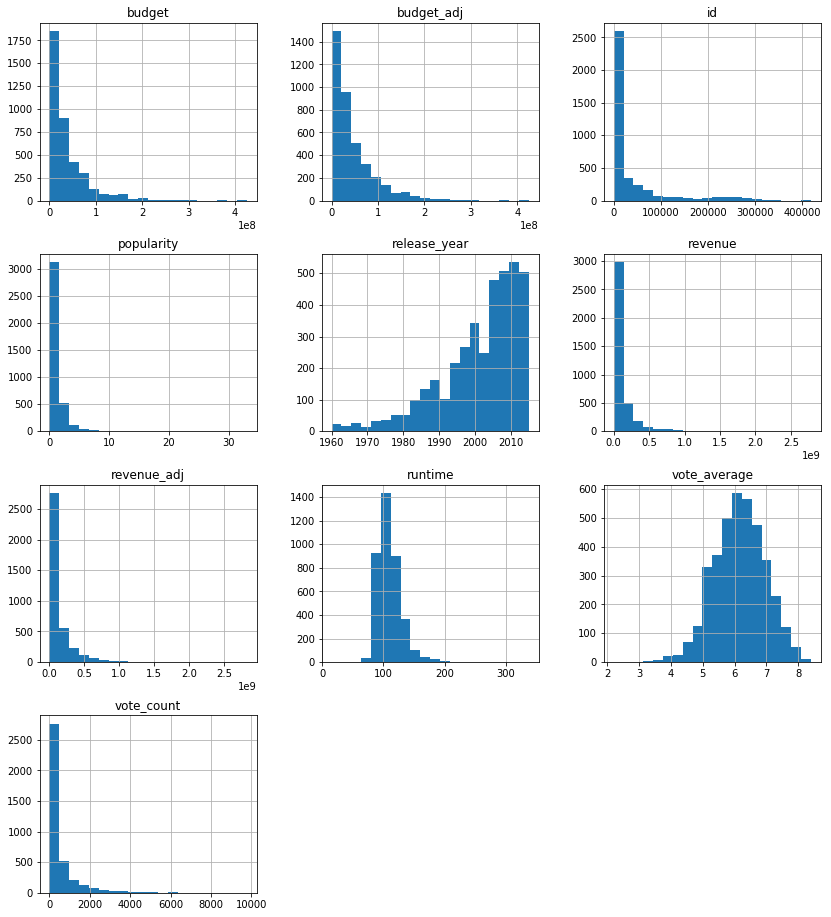

In [11]:
tmdb_data.hist(bins=20, figsize= (14,16)); #histogram for whole data set 

1) Getting the net profit

we will dedcut the budget from the revenues




1-A )The top 5 movies with the hightest profit

In [12]:
tmdb_data.insert(5,'profit_earned',tmdb_data['revenue']-tmdb_data['budget'])

#printing dataset
tmdb_data.sort_values(by=['profit_earned'],inplace=True,ascending=False)
tmdb_data.head(5)



,id,imdb_id,popularity,budget,revenue,profit_earned,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,2.544506e+09,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,1.645034e+09,Titanic,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


1-B ) The  5 movies with the lowest profit

In [13]:
#printing dataset
tmdb_data.sort_values(by=['profit_earned'],inplace=True,ascending=False)
tmdb_data.tail(5)

,id,imdb_id,popularity,budget,revenue,profit_earned,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4970,10009,tt0328880,1.653031,100000000.0,250.0,-99999750.0,Brother Bear,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,753,6.8,2003,1.185353e+08,2.963382e+02
3484,50321,tt1305591,0.921653,150000000.0,38992758.0,-111007242.0,Mars Needs Moms,Simon Wells,88,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,129,5.5,2011,1.454097e+08,3.779950e+07
7031,10733,tt0318974,0.948560,145000000.0,25819961.0,-119180039.0,The Alamo,John Lee Hancock,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,5.9,2004,1.673946e+08,2.980774e+07
5508,57201,tt1210819,1.214510,255000000.0,89289910.0,-165710090.0,The Lone Ranger,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,2.386885e+08,8.357833e+07
2244,46528,tt1032751,0.250540,425000000.0,11087569.0,-413912431.0,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07


2 ) The most frequent directors

In [14]:
tmdb_data['director'].value_counts().head(5)
            

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
Name: director, dtype: int64

3 ) top company production

In [15]:
tmdb_data['production_companies'].value_counts().head(5)


Paramount Pictures    77
Universal Pictures    57
Columbia Pictures     39
New Line Cinema       38
Warner Bros.          33
Name: production_companies, dtype: int64

4 ) How is runtime is trending over time?

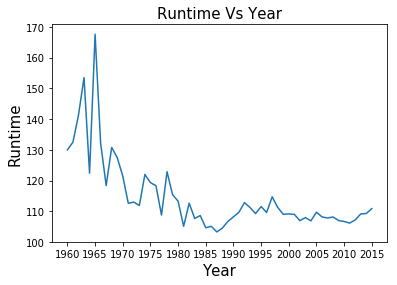

In [16]:
#group  data by their release_year and find the mean of runtime to each group
tmdb_data.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#organizing the demonstration
sns.set(rc={'figure.figsize':(19,7)})

#writtind down the title 
plt.title("Runtime Vs Year",fontsize = 15)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Runtime',fontsize = 15)
sns.set_style("whitegrid")

It is pretty clear the effect of the modern life style and the increase pace of life on the runtime , as the movies get shorter in the present than the past

5 )How is popularity trending over time?


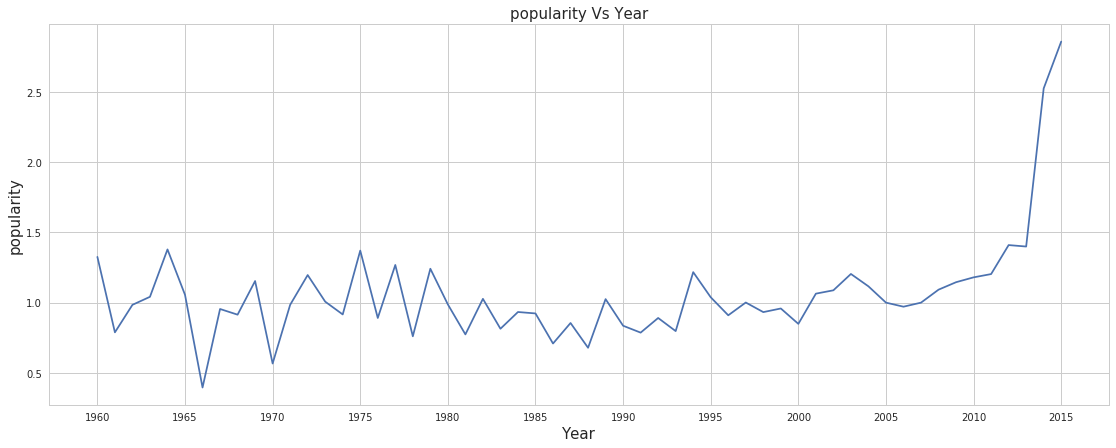

In [17]:
#group  data by their release year and find the mean of popularity to each group
tmdb_data.groupby('release_year').mean()['popularity'].plot(xticks = np.arange(1960,2016,5))

#organizing the demonstration
sns.set(rc={'figure.figsize':(19,7)})

#writting down the title 
plt.title("popularity Vs Year",fontsize = 15)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 15)
plt.ylabel('popularity',fontsize = 15)
sns.set_style("whitegrid")

There is no clear direct relationship between time and popularity , sometimes old is gold , sometimes the technology and the cinematic effects attract people not just the good plot and good scenario


6) How are revenues trending over time


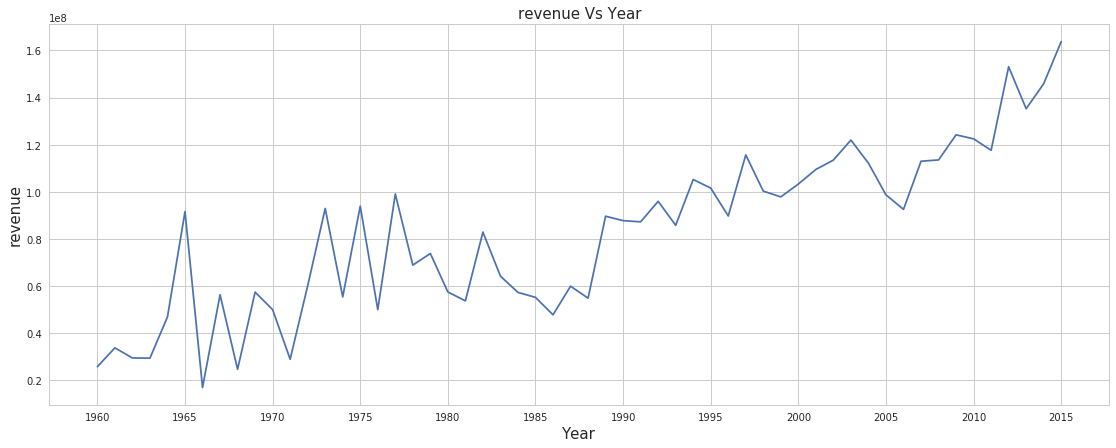

In [18]:
#group  data by their release year and find the mean of revenues to each group
tmdb_data.groupby('release_year').mean()['revenue'].plot(xticks = np.arange(1960,2016,5))

#organizing the demonstration
sns.set(rc={'figure.figsize':(19,7)})

#writting down the title 
plt.title("revenue Vs Year",fontsize = 15)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 15)
plt.ylabel('revenue',fontsize = 15)
sns.set_style("whitegrid")

Despite the previous relationship , starting from the 1990 which maybe the end of the cold war and start of globilization and the rise of the economy there is a huge increase in the reveneues of the movies

### Are there any diference in profit through different years?

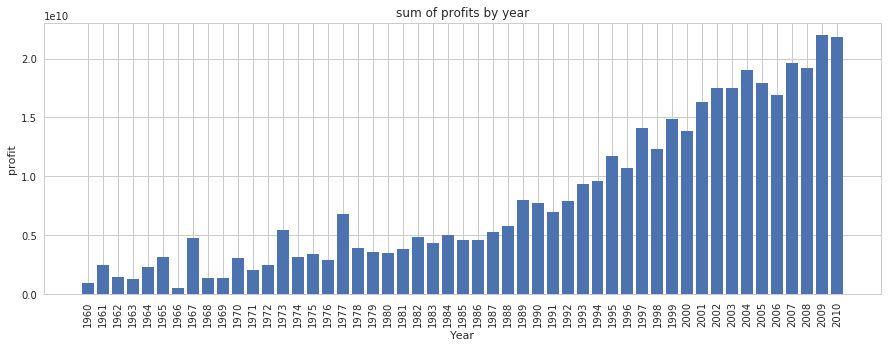

In [19]:
# group data by year and sum the profit
profit = tmdb_data.groupby("release_year")["revenue_adj"].sum()
profit5 = profit[:-5]

# enlarge the figure size
plt.figure(figsize=(15,5))

# plot bar gragh between "year" x-axis and "budget_adj" y-axis
plt.bar(profit5.index, np.array(profit5));

# change x and y-label
plt.xlabel('Year');
plt.ylabel('profit');

# set title
plt.title('sum of profits by year');

# set ticks on x-axis
plt.xticks(profit5.index, rotation=90);

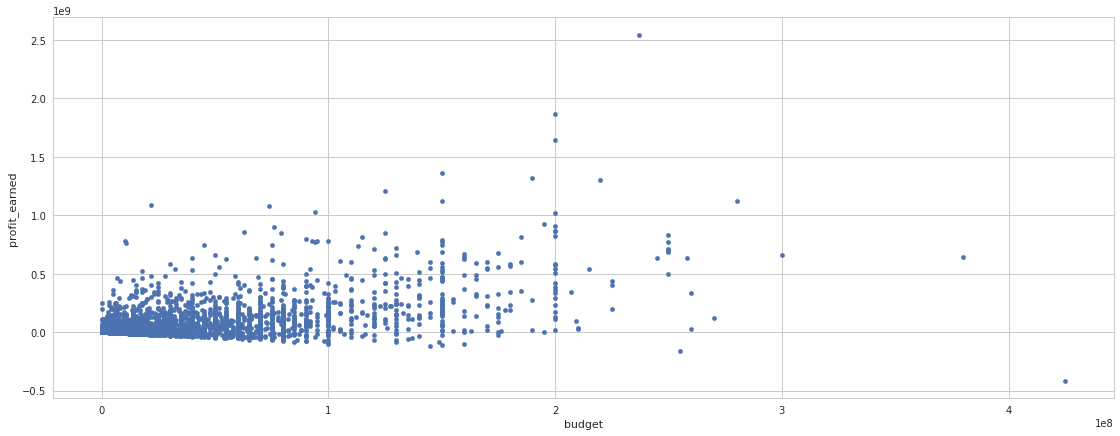

In [20]:

tmdb_data.plot.scatter(x='budget', y='profit_earned')

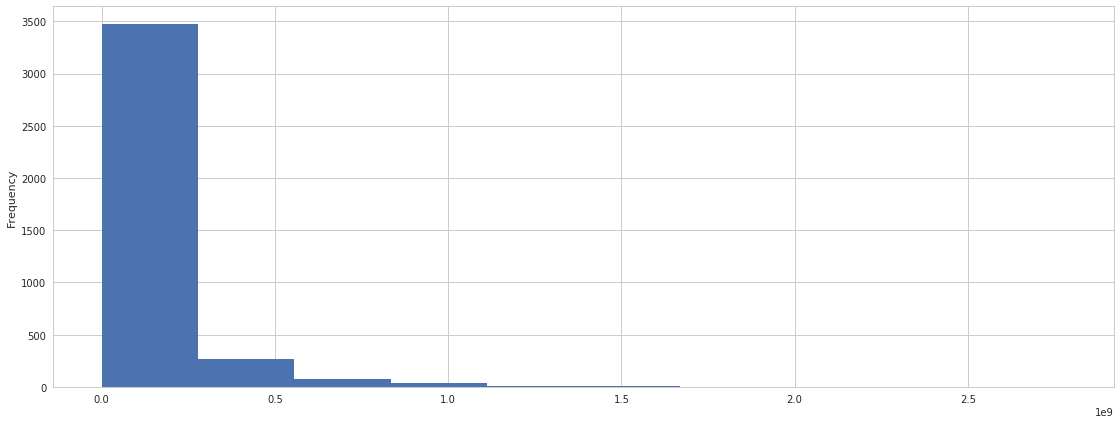

In [21]:
tmdb_data['revenue'].plot(kind="hist")

Conclusions

after sorting , filteration and cleaning the data we found that top movies from point of revenues are actions/adventures movies and with runtime more than 120 minutes 

limitations

1) duplicate rows and has been removed

2) null values and has been removed

3) the sheet is from one soure only TMDB and it maybe biased

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0